<a href="https://colab.research.google.com/github/Parabolistic/Learning/blob/master/Brigada11_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Подключение Pandas, Matplotlib и NumPy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Получение данных со статьи в Вкикпедии
url = "https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BF%D0%BB%D0%BE%D0%B2%D0%B0%D1%8F_%D1%8D%D0%BD%D0%B5%D1%80%D0%B3%D0%B5%D1%82%D0%B8%D0%BA%D0%B0_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
id_table = 0
df_power = pd.read_html(url, header = 0, index_col = 0, thousands='.', decimal=',')[id_table]
df_power

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
1,Сургутская ГРЭС-2,5657.1,"попутный нефтяной газ, природный газ",1985—2011,Юнипро,Ханты-Мансийский АО
2,Рефтинская ГРЭС,3800.0,каменный уголь,1970—1980,Кузбассэнерго,Свердловская область
3,Костромская ГРЭС,3600.0,природный газ,1969—1980,Интер РАО,Костромская область
4,Пермская ГРЭС,3363.0,природный газ,1986—2017,Интер РАО,Пермский край
5,Сургутская ГРЭС-1,3333.0,"попутный нефтяной газ, природный газ",1972—1983,ОГК-2,Ханты-Мансийский АО
6,Рязанская ГРЭС,3130.0,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область


**1. Сортировка данных**

In [0]:
# Сортировка по названию
df_power_sort = df_power.sort_values(['Название ТЭС'])
df_power_sort

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
11,Берёзовская ГРЭС,2400.0,бурый уголь,1987—2015,Юнипро,Красноярский край
13,Заинская ГРЭС,2204.9,природный газ,1963—1972,Татэнерго,Татарстан
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область
3,Костромская ГРЭС,3600.0,природный газ,1969—1980,Интер РАО,Костромская область
14,Нижневартовская ГРЭС,2031.0,попутный нефтяной газ,1993—2014,Интер РАО,Ханты-Мансийский АО
12,Новочеркасская ГРЭС,2258.0,"каменный уголь, природный газ",1965—2016,ОГК-2,Ростовская область
4,Пермская ГРЭС,3363.0,природный газ,1986—2017,Интер РАО,Пермский край


In [0]:
# Сортировка по возрастанию мощности
df_power_sort = df_power.sort_values(['Установленная мощность, МВт'], ascending = True)
df_power_sort

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
14,Нижневартовская ГРЭС,2031.0,попутный нефтяной газ,1993—2014,Интер РАО,Ханты-Мансийский АО
13,Заинская ГРЭС,2204.9,природный газ,1963—1972,Татэнерго,Татарстан
12,Новочеркасская ГРЭС,2258.0,"каменный уголь, природный газ",1965—2016,ОГК-2,Ростовская область
11,Берёзовская ГРЭС,2400.0,бурый уголь,1987—2015,Юнипро,Красноярский край
10,Ставропольская ГРЭС,2423.0,природный газ,1975—1983,ОГК-2,Ставропольский край
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область
6,Рязанская ГРЭС,3130.0,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область


**2. Добавление к таблице столбца с новыми данными, полученных путем преобразований имеющихся**

In [0]:
# Вычисление суммы мощностей и рассчет процентной доли от этой суммы для каждой ТЭС
df_power_2 = df_power.copy() # создание копии исходной таблицы
power_sum = df_power_2['Установленная мощность, МВт'].sum()
power_port = df_power_2.iloc[: , 1] / power_sum * 100
df_power_2['Доля от общей мощности, %'] = power_port
df_power_2

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион,"Доля от общей мощности, %"
№,,,,,,,
1,Сургутская ГРЭС-2,5657.1,"попутный нефтяной газ, природный газ",1985—2011,Юнипро,Ханты-Мансийский АО,13.551563
2,Рефтинская ГРЭС,3800.0,каменный уголь,1970—1980,Кузбассэнерго,Свердловская область,9.102887
3,Костромская ГРЭС,3600.0,природный газ,1969—1980,Интер РАО,Костромская область,8.623787
4,Пермская ГРЭС,3363.0,природный газ,1986—2017,Интер РАО,Пермский край,8.056055
5,Сургутская ГРЭС-1,3333.0,"попутный нефтяной газ, природный газ",1972—1983,ОГК-2,Ханты-Мансийский АО,7.984190
6,Рязанская ГРЭС,3130.0,"бурый уголь, каменный уголь, природный газ",1973—2016,Интер РАО,Рязанская область,7.497904
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область,6.216313
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область,6.036651
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область,5.821056


**3. Выбор фрагмента таблицы по условию**


In [0]:
# Выбор из таблицы станций с мощностью меньше 3000 МВт
df_power_cond = df_power[df_power['Установленная мощность, МВт'] < 3000]
df_power_cond

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область
10,Ставропольская ГРЭС,2423.0,природный газ,1975—1983,ОГК-2,Ставропольский край
11,Берёзовская ГРЭС,2400.0,бурый уголь,1987—2015,Юнипро,Красноярский край
12,Новочеркасская ГРЭС,2258.0,"каменный уголь, природный газ",1965—2016,ОГК-2,Ростовская область
13,Заинская ГРЭС,2204.9,природный газ,1963—1972,Татэнерго,Татарстан
14,Нижневартовская ГРЭС,2031.0,попутный нефтяной газ,1993—2014,Интер РАО,Ханты-Мансийский АО


In [0]:
# Выбор из таблицы станций, использующих только природный газ 
df_power_cond = df_power[df_power.топливо == 'природный газ']
df_power_cond

,Название ТЭС,"Установленная мощность, МВт",топливо,Годы ввода агрегатов,Собственник,Регион
№,,,,,,
3,Костромская ГРЭС,3600.0,природный газ,1969—1980,Интер РАО,Костромская область
4,Пермская ГРЭС,3363.0,природный газ,1986—2017,Интер РАО,Пермский край
7,Киришская ГРЭС,2595.0,природный газ,1969—2012,ОГК-2,Ленинградская область
8,Конаковская ГРЭС,2520.0,природный газ,1964—1968,Энел Россия,Тверская область
9,Ириклинская ГРЭС,2430.0,природный газ,1970—1979,Интер РАО,Оренбургская область
10,Ставропольская ГРЭС,2423.0,природный газ,1975—1983,ОГК-2,Ставропольский край
13,Заинская ГРЭС,2204.9,природный газ,1963—1972,Татэнерго,Татарстан


**4. Выбор фрагмента таблицы по номерам строк и столбцов**

In [0]:
# Данные из пятой строки и четвертого столбца
df_power.iloc[5 , 4]

'Интер РАО'

In [0]:
# Данные из всех строк, кроме шести последних и из столбцов с третьего по пятый
df_power.iloc[: -6, 3 : 5]

,Годы ввода агрегатов,Собственник
№,,
1,1985—2011,Юнипро
2,1970—1980,Кузбассэнерго
3,1969—1980,Интер РАО
4,1986—2017,Интер РАО
5,1972—1983,ОГК-2
6,1973—2016,Интер РАО
7,1969—2012,ОГК-2
8,1964—1968,Энел Россия


In [0]:
# Данные из нечетных строк и второго столбца
df_power.iloc[ : : 2, 2]

№
1     попутный нефтяной газ, природный газ
3                            природный газ
5     попутный нефтяной газ, природный газ
7                            природный газ
9                            природный газ
11                             бурый уголь
13                           природный газ
Name: топливо, dtype: object

**5. Расчеты статистических показателей по сгруппированным данным**

In [0]:
# Количество электростанций у каждого собственника
df_power.groupby(['Собственник'])['Собственник'].count()

Собственник
Интер РАО        5
Кузбассэнерго    1
ОГК-2            4
Татэнерго        1
Энел Россия      1
Юнипро           2
Name: Собственник, dtype: int64

**6. Построение гистограммы по данным**

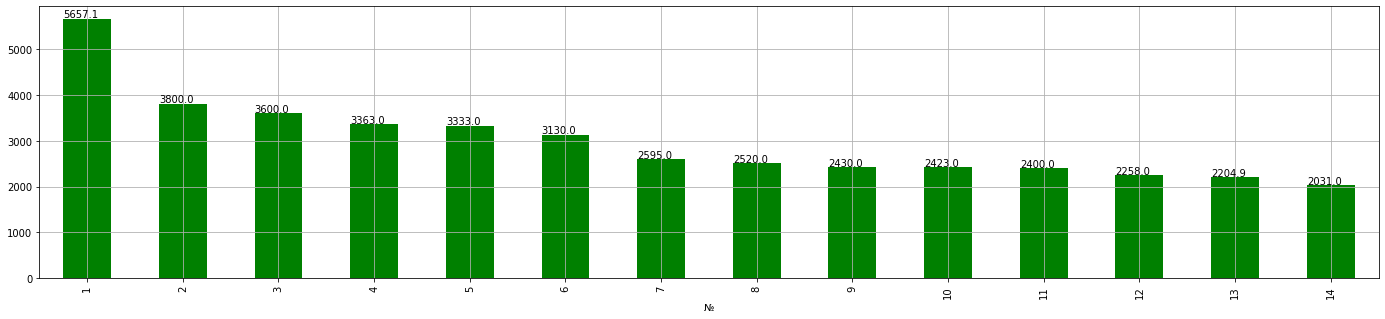

In [0]:
# Гистограмма
axes = df_power.iloc[: , 1].plot(kind = 'bar', figsize=(24, 5), color = 'green')
for p in axes.patches:
    axes.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))
axes.grid(True)

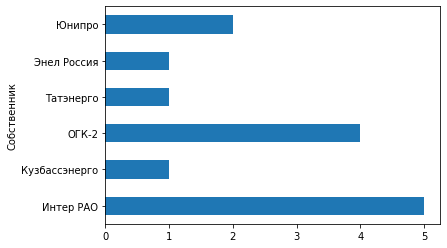

In [0]:
# Гистограмма количества станций у собственников 
df_power.groupby(['Собственник'])['Собственник'].count().plot(kind = 'barh')
print()

**7. Построение круговой диаграммы по данным**

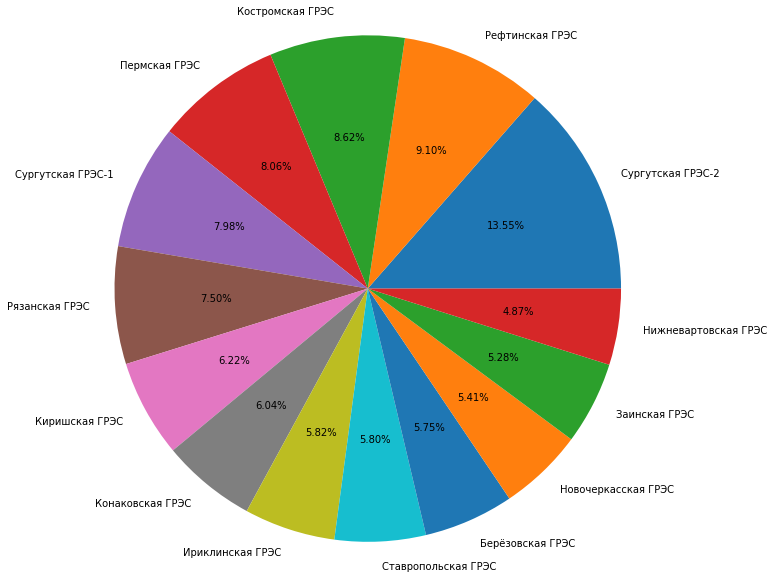

In [0]:
# Визуализация доли мощности каждой ТЭС от общей мощности в виде круговой диаграммы
labels = df_power.iloc[: , 0]
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(power_port, labels = labels, autopct = '%1.2f%%')
ax1.axis('equal')  
plt.show()

**8. Построение интерактивного графика по данным**

In [0]:
# Подключение библиотек для интерактивного графика
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import numpy as np

output_notebook()

In [0]:
# Построение интерактивной гистограммы
# источник - https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html
p = figure(x_range=df_power.iloc[: , 0], plot_width=1600, plot_height=400, title="Установленная мощность, МВт")

p.vbar(x=df_power.iloc[: , 0], top=df_power.iloc[: , 1], width=0.5)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)